In [62]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math

In [63]:
#read the data

bikes = pd.read_csv("bikes.csv")

In [64]:
#prelim analysis and feature selection
bikes_prep = bikes.copy()

In [65]:
bikes_prep = bikes_prep.drop(["index","date","casual","registered"] , axis= 1)

In [66]:
#checking of missing value

bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

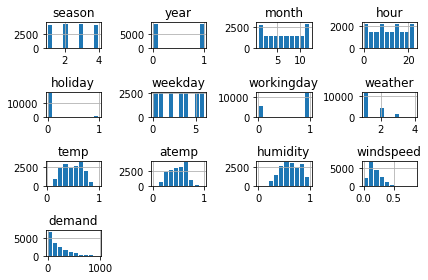

In [67]:
#visualising data using pandas histograms

bikes_prep.hist(rwidth= 0.8)
plt.tight_layout()

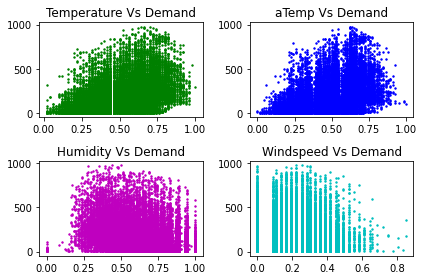

In [68]:
#visualising the continuous features with demand

plt.subplot(2,2, 1)
plt.title("Temperature Vs Demand")
plt.scatter(bikes_prep["temp"],bikes_prep["demand"],s=2 , c ="g")

plt.subplot(2,2,2)
plt.title("aTemp Vs Demand") 
plt.scatter(bikes_prep["atemp"],bikes_prep["demand"],s=2 , c= "b")

plt.subplot(2,2,3)
plt.title("Humidity Vs Demand")
plt.scatter(bikes_prep["humidity"],bikes_prep["demand"], s=2, c = "m")

plt.subplot(2,2,4)
plt.title("Windspeed Vs Demand")
plt.scatter(bikes_prep["windspeed"],bikes_prep["demand"], s=2 , c = "c")

plt.tight_layout()

From above we can see that Temp and aTemp are almost identical


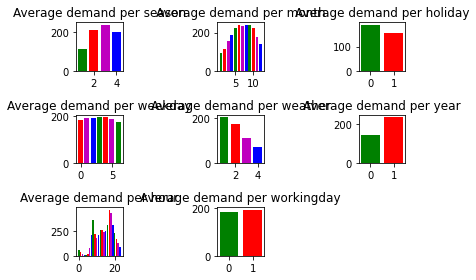

In [69]:
# plot and visualise the categorical features
colours = ["g", "r", "m","b"]
plt.subplot(3, 3, 1)
plt.title("Average demand per season")
#create list of unique value in season
cat_list = bikes_prep["season"].unique()
#average the demand based on season
cat_average = bikes_prep.groupby("season").mean()["demand"]
plt.bar(cat_list,cat_average, color= colours) 

plt.subplot(3,3,2)
plt.title("Average demand per month")
cat_list = bikes_prep["month"].unique()
cat_average = bikes_prep.groupby("month").mean()["demand"]
plt.bar(cat_list,cat_average , color=colours)

plt.subplot(3,3,3)
plt.title("Average demand per holiday")
cat_list = bikes_prep["holiday"].unique()
cat_average = bikes_prep.groupby("holiday").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.subplot(3,3,4)
plt.title("Average demand per weekday")
cat_list = bikes_prep["weekday"].unique()
cat_average = bikes_prep.groupby("weekday").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.subplot(3,3,5)
plt.title("Average demand per weather")
cat_list = bikes_prep["weather"].unique()
cat_average = bikes_prep.groupby("weather").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.subplot(3,3,6)
plt.title("Average demand per year")
cat_list = bikes_prep["year"].unique()
cat_average = bikes_prep.groupby("year").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.subplot(3,3,7)
plt.title("Average demand per hour")
cat_list = bikes_prep["hour"].unique()
cat_average = bikes_prep.groupby("hour").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.subplot(3,3,8)
plt.title("Average demand per workingday")
cat_list = bikes_prep["workingday"].unique()
cat_average = bikes_prep.groupby("workingday").mean()["demand"]
plt.bar(cat_list,cat_average,color = colours)

plt.tight_layout()


In [70]:
#check for outliers

bikes_prep["demand"].describe()

bikes_prep["demand"].quantile([0.05,0.1,0.15,0.2,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.20     27.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [71]:
#Multilinear regression  assumtion

#Linearity using correlation coefficient matrix using corr

correlation = bikes_prep[["temp", "atemp", "humidity", "windspeed", "demand"]].corr()

print(correlation)



               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


Since Temp and atemp are identical droping atemp, And drop windspeed since it doesnot have correlation with demand

In [72]:
bikes_prep = bikes_prep.drop(["atemp","windspeed", "workingday", "year", "weekday"], axis = 1)

Droping year(eventhough we can see there is increase from first year to second, having only two might affect the prediction. And droping working day and weekday features since there are big change happening

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f439b7df2e8>)

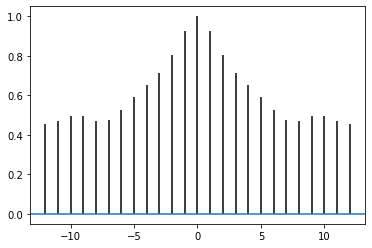

In [73]:
# Checking the auto correlation in demand using acorr

df1 = pd.to_numeric(bikes_prep["demand"], downcast="float")

plt.acorr(df1, maxlags =12)


There are high auto-correlation in demand

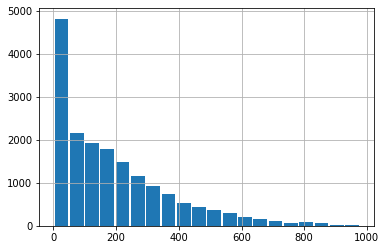

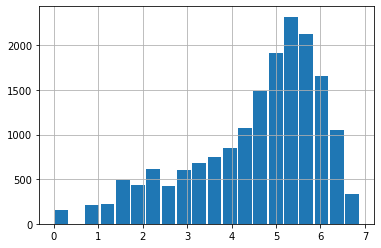

In [74]:
#checking the distribution of demand

df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9 , bins = 20)
plt.figure()
df2.hist(rwidth = 0.9, bins= 20)

since demand was not normally distributed, converted demand values to log value to check whether it is normally distributed and yes it is

In [75]:
bikes_prep["demand"] = np.log(bikes_prep["demand"])

In [76]:
# Autocorrelation in the demand column

t_1 = bikes_prep["demand"].shift(+1).to_frame()
t_1.columns = ["t-1"]

t_2 = bikes_prep["demand"].shift(+2).to_frame()
t_2.columns = ["t-2"]

t_3 = bikes_prep["demand"].shift(+3).to_frame()
t_3.columns = ["t-3"]

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3], axis = 1)
bikes_prep_lag = bikes_prep_lag.dropna()

Since there was auto correlation used shift method to shift 3 values and droping the missing value

In [77]:
#create the dummy variables and drop first
#to avoid dummy variables trap using get_dummy
# columns - season,month,holiday,hour,weather

print(bikes_prep_lag.dtypes)

bikes_prep_lag[["season","holiday","month","hour","weather"]]= \
    bikes_prep_lag[["season","holiday","month","hour","weather"]].astype("category")
                              
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first= True )   

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object


Since the datatypes of categorical variables are int changing them into categorical before creating dumming variables

In [78]:
#Step 8 - Split data to X and Y for train and test

Y = bikes_prep_lag[["demand"]]
X = bikes_prep_lag.drop(["demand"], axis=1)

Splited the date to independent and dependent variable

In [ ]:
#Create the size of 70 % of the data

tr_size = 0.7* len(X)
tr_size = int(tr_size)

In [ ]:
#Creating train and test

X_train = X.values[0: tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0: tr_size]
Y_test = Y.values[tr_size : len(Y)]


for train and test splited the record into 70:30 ratio

In [79]:
#Train the data and score

from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()

std_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
#R square
r2_train = std_reg.score(X_train,Y_train)
r2_test = std_reg.score(X_test,Y_test)

print(r2_train)
print(r2_test)

0.9195240591465778
0.9287151360253384


The R-squarted is more than 90% which is good

In [82]:
#predict the data
Y_predict = std_reg.predict(X_test)

In [83]:
#Root mean square error
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))

print(rmse)


0.38098800498170443


Root mean squared error is 0.3809

In [ ]:
#Final step - to calculate RMSLE

Y_test_e = []
Y_predict_e = []

#
for i in range(0 , len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    
log_sum = 0.0
#RMSLE
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] +1)
    log_diff = (log_p - log_a)**2
    log_sum = log_sum + log_diff
    
rmsle = math.sqrt(log_sum/len(Y_test))

print(rmsle)

0.3560941706980211


And the Root mean squared logarithmic error is 0.3560 Which means the model is done good job in predicting dependent variable with less error
